In [9]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [10]:
# Importing CSV File
df=pd.read_csv('C:\\Users\\admin\\Downloads\\Powerplant_India.csv')

In [11]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 908
No of Columns: 25


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

# Statistical Analysis
Before Going for Statistical exploration of data, first check integrity of data & Missing value

Data Integrity Check
Let check if any whitespace,'?' 'NA' or '-' exist in dataset.

In [13]:
df.isin([' ','NA','-','?']).sum().any()

False

In [14]:
df.duplicated().sum() # This will check if any duplicate entry or duplicate row with same value exist

0

In [15]:
df.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [16]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.083700
generation_gwh_2013                524       57.709251
generation_gwh_2014                507       55.837004
generation_gwh_2015                483       53.193833
generation_gwh_2016                471       51.872247
generation_gwh_2017                465       51.211454
generation_data_source             458       50.440529
commissioning_year                 380       41.850220
latitude                            46        5.066079
longitude                           46        5.066079
geolocation_source                  19        2.092511
name                                 0        0.000000
capacity_mw                          0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000


# Missing value Impuatation

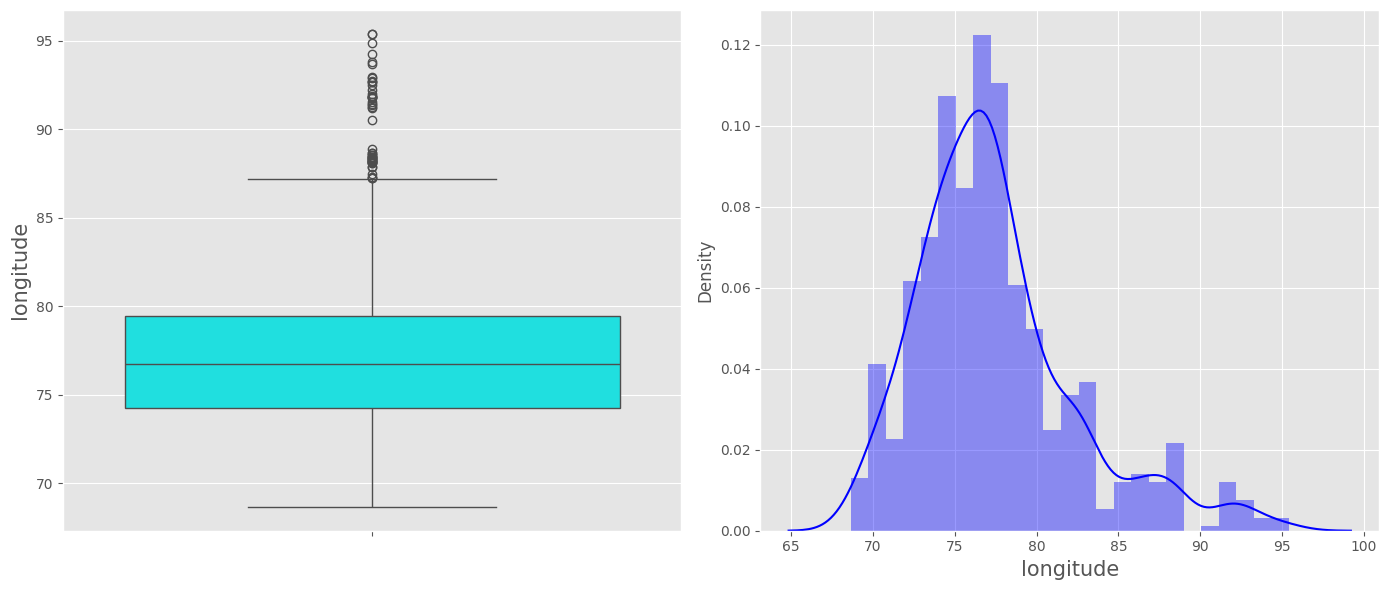

In [17]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=df,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

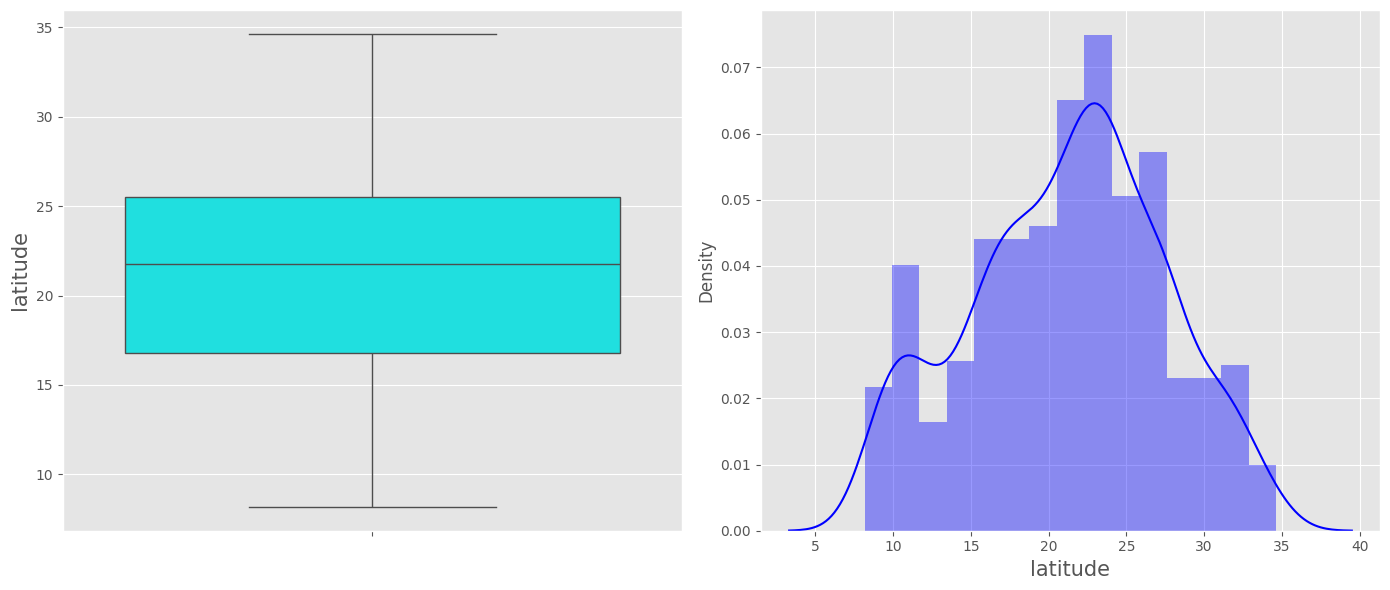

In [18]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=df,color='cyan')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

In [19]:
# Missing Value Imputation of geolocation with mode
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
# Missing Value Imputation of longitude with median
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
# Missing Value Imputation of latitude with mean
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [20]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.083700
generation_gwh_2013                524       57.709251
generation_gwh_2014                507       55.837004
generation_gwh_2015                483       53.193833
generation_gwh_2016                471       51.872247
generation_gwh_2017                465       51.211454
generation_data_source             458       50.440529
commissioning_year                 380       41.850220
name                                 0        0.000000
capacity_mw                          0        0.000000
latitude                             0        0.000000
longitude                            0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000
geolocation_source                   0        0.000000


# Statstical Matrix

In [21]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,528.000000,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.410936,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.088110,4.783873,17.047817,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1988.000000,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.278850,76.719250,2000.000000,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.183775,79.211600,2011.250000,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


# Regression Target feature - Capacity
Before visualing feature let find details about Smallest & Biggest Powerplant

In [22]:
print('Minimum Capacity of Powerplant:',df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [23]:
df.loc[df.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
881,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,26761.39,27594.0,29047.0,30015.0,35116.0,Central Electricity Authority


In [24]:
df.loc[df.capacity_mw==0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
830,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN


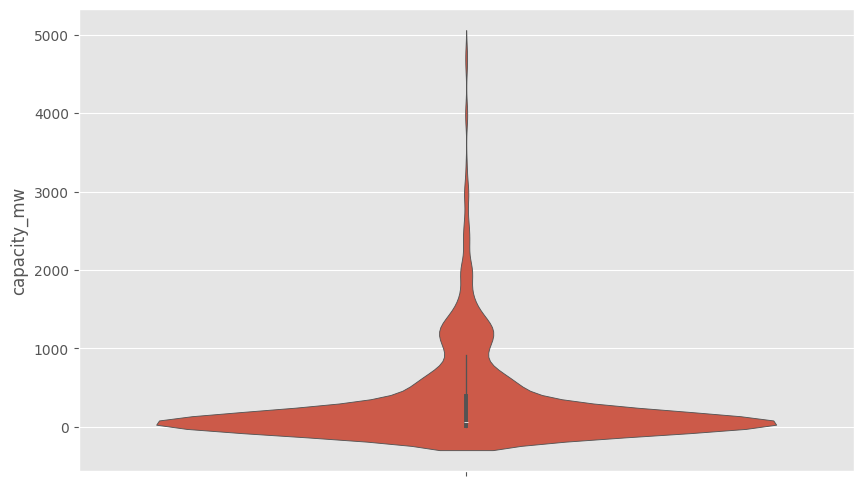

In [25]:
plt.figure(figsize=(10,6))
sns.violinplot(df.capacity_mw)
plt.show()

In [26]:
df.loc[df.capacity_mw >1500].shape

(37, 15)

In [29]:
df.primary_fuel.value_counts()

primary_fuel
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: count, dtype: int64

In [30]:
print('Total Power Generation Capacity of all Power Plants:',df['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 291510.11100000003 MW


In [31]:
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,201423.220
Gas,25123.871
Hydro,46331.570
Nuclear,8780.000
Oil,1978.840
Solar,2757.500
Wind,4111.850


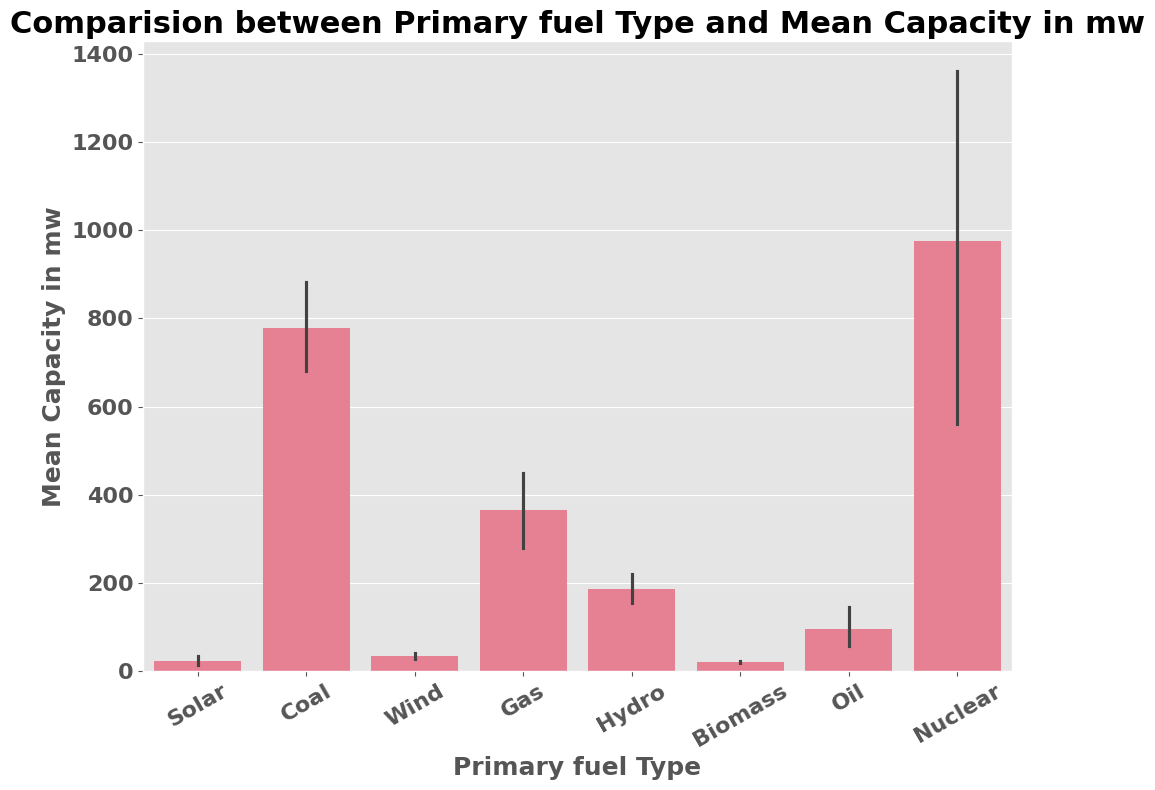

In [32]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

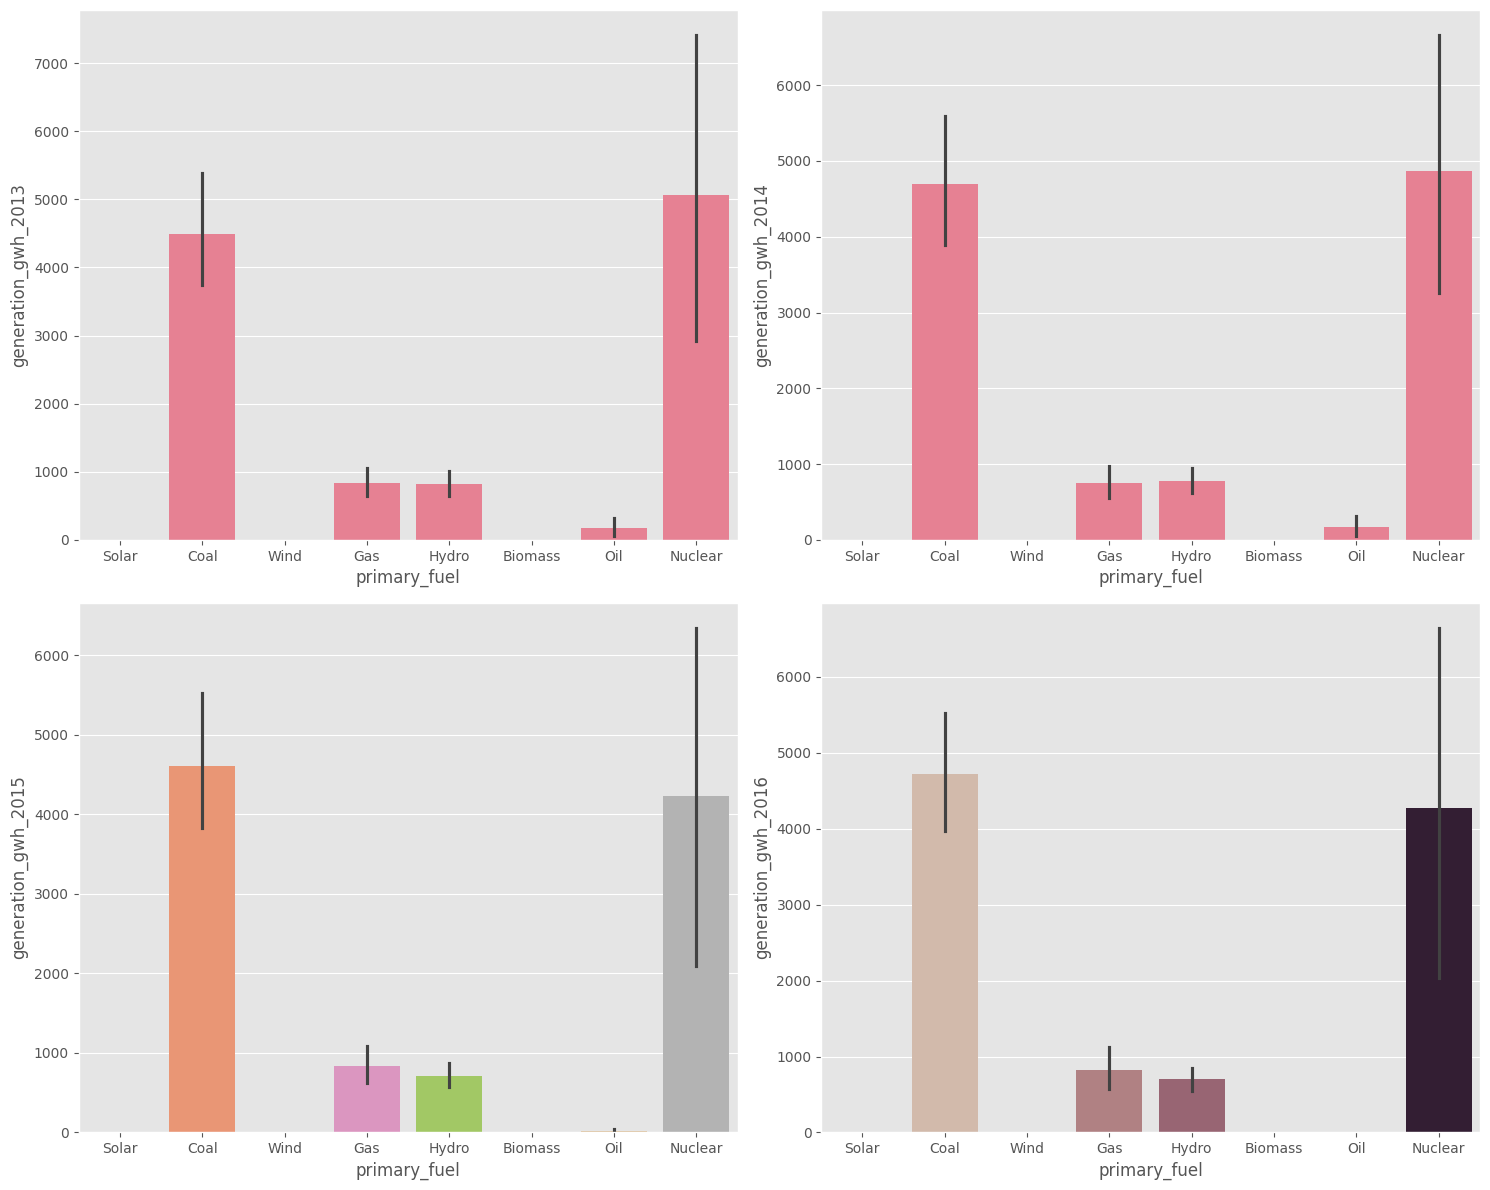

In [33]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2013
sns.barplot(x='primary_fuel',y='generation_gwh_2013',ax=axes[0,0],data=df)

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,1],data=df)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[1,0],data=df,palette="Set2")

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()


# Location vs Primary Fuel

In [39]:
# Lets extract power plant age from commissioning year by subtracting it from the year 2018
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [40]:
print('The oldest powerplant Age :',df.Power_plant_age.max())
print('The youngest powerplant Age :',df.Power_plant_age.min())

The oldest powerplant Age : 91.0
The youngest powerplant Age : 0.0


In [41]:
df.loc[df.Power_plant_age==91]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,Power_plant_age
729,SIVASAMUNDRUM,42.0,12.3082,77.165,Hydro,NaN,Central Electricity Authority,WRI,217.97465,220.82035,215.3777,144.4143,175.92595,Central Electricity Authority,91.0


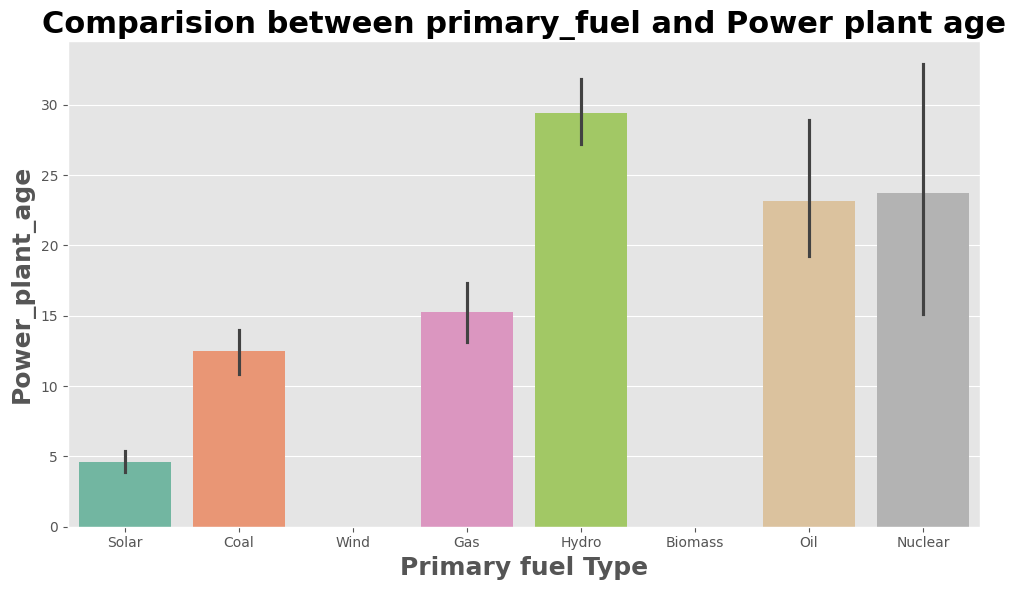

In [42]:
#Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=22, fontweight='bold')
a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('Power_plant_age',fontsize=18,fontweight ='bold')
plt.show()

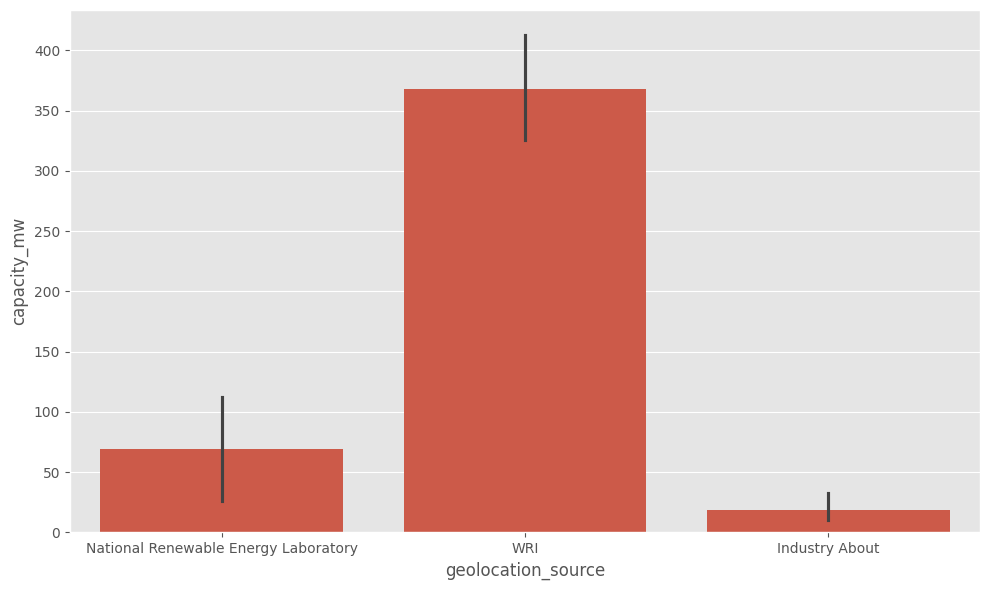

In [44]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

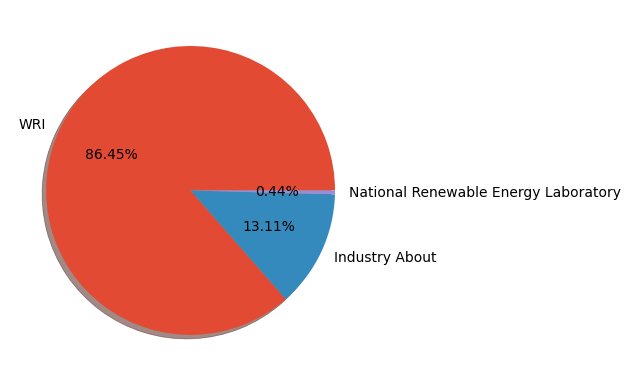

In [45]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

# Distribution of features

In [46]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']

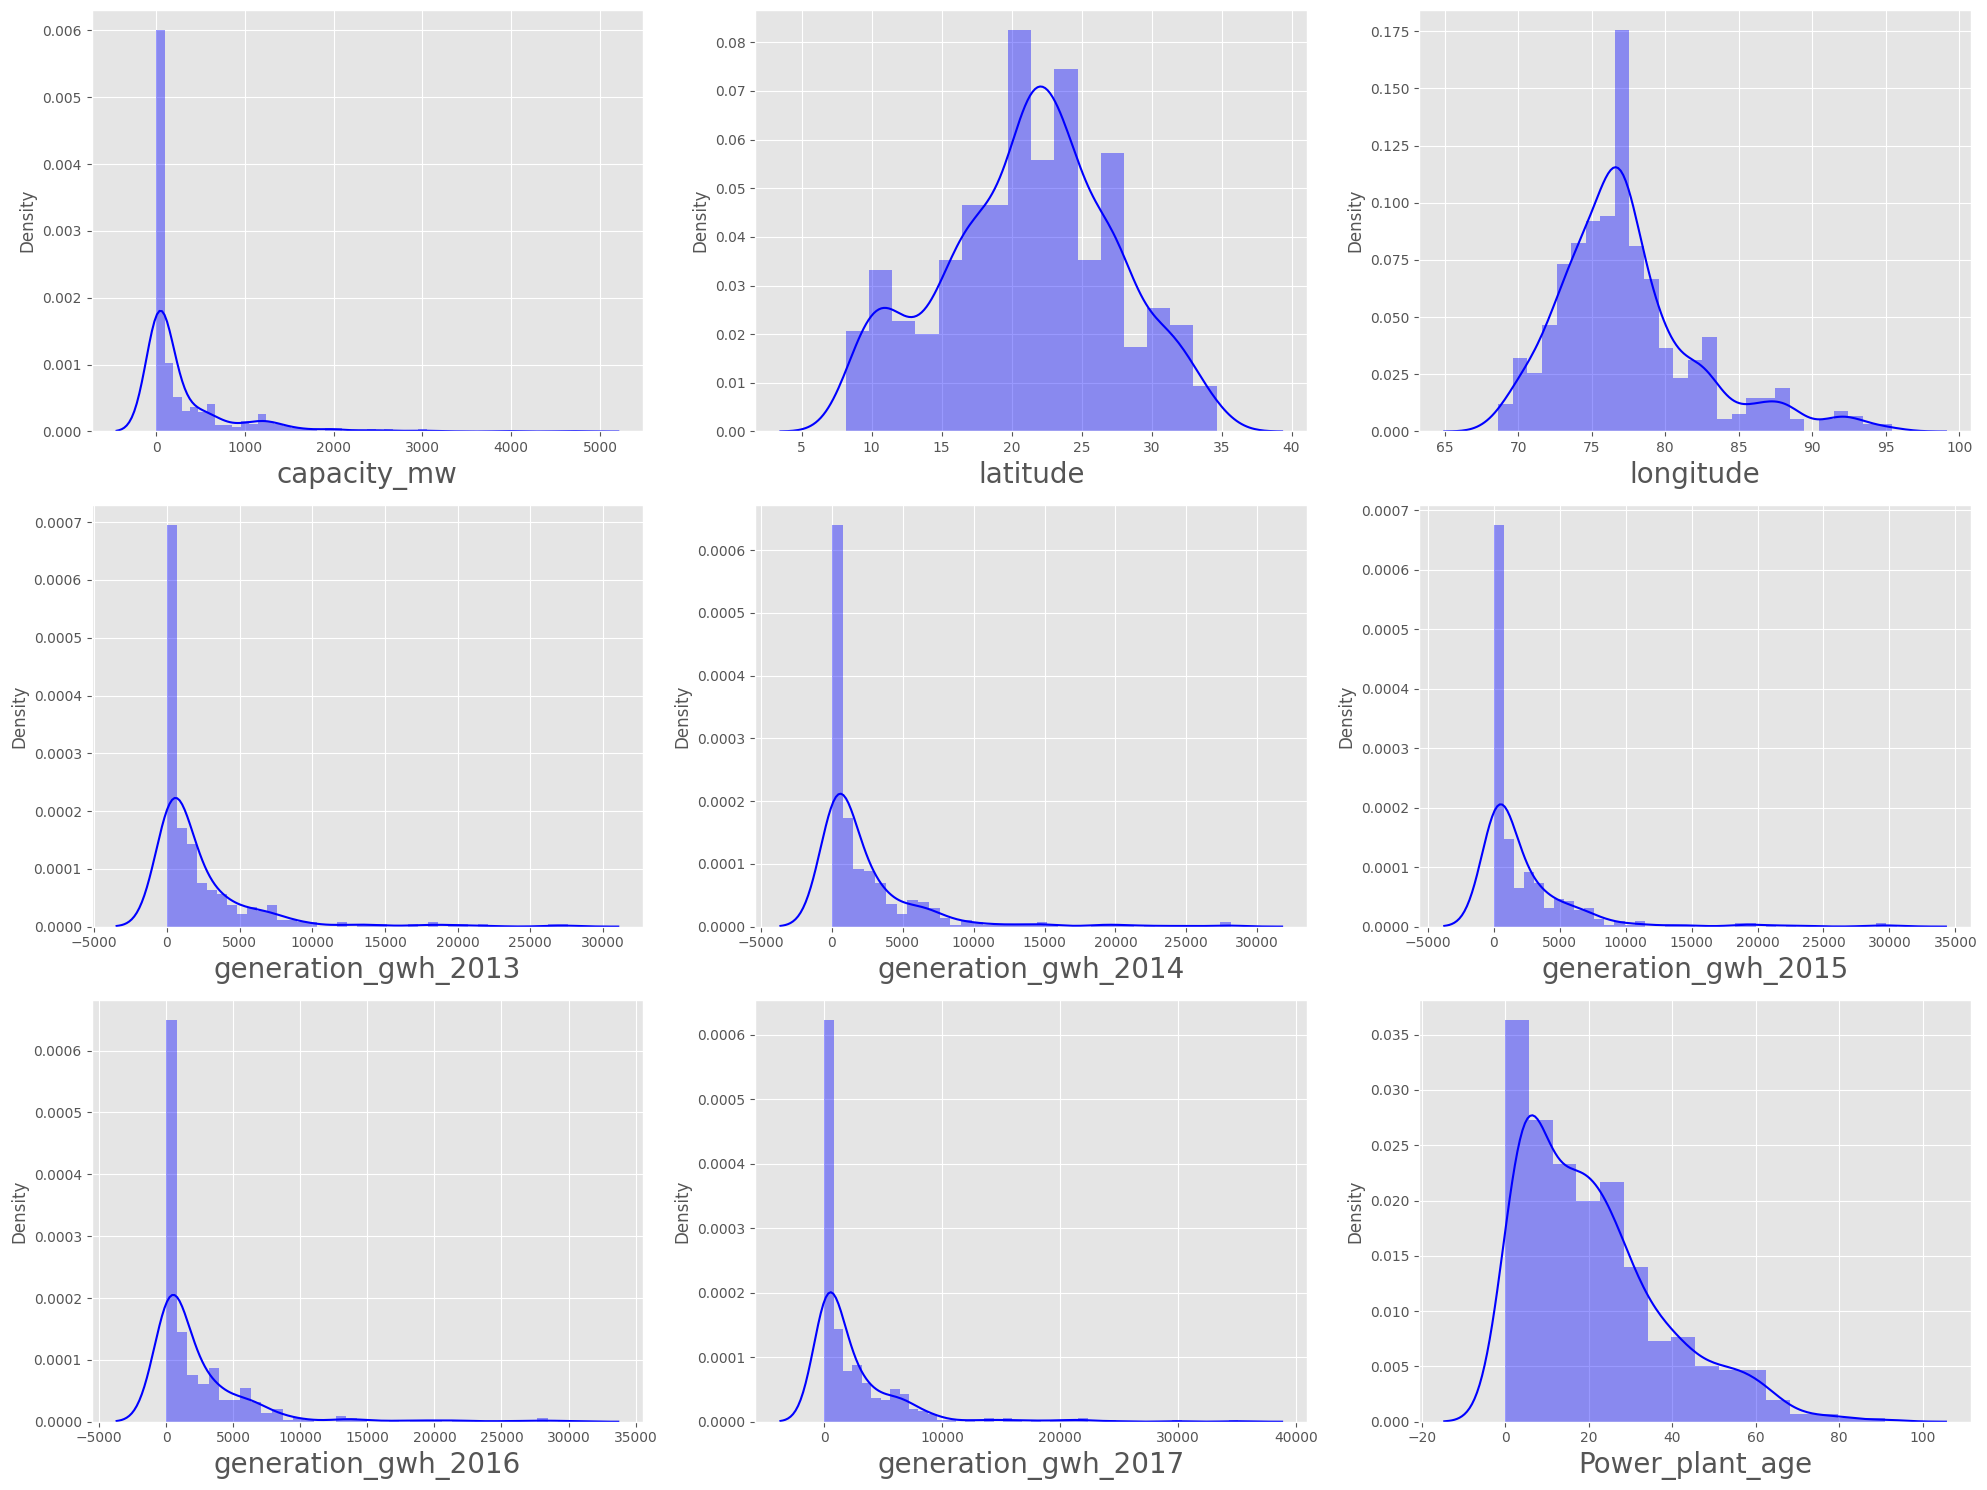

In [47]:
# Checking how the data has been distributed in each column

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

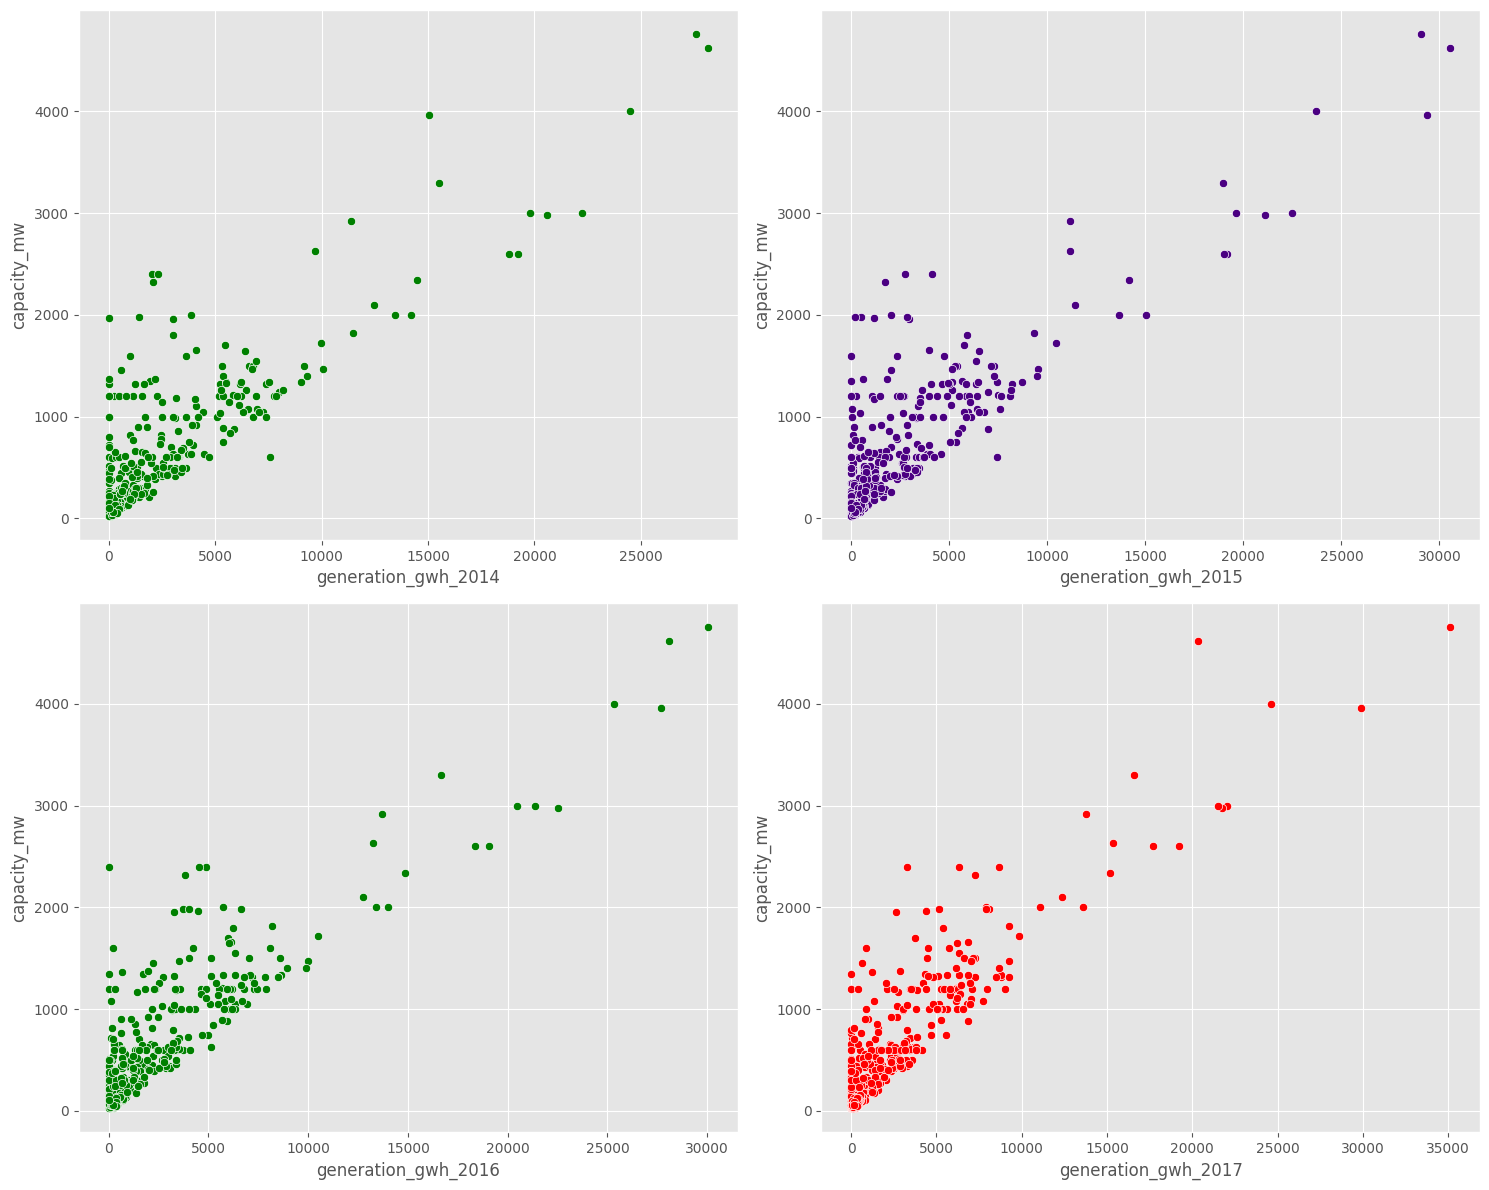

In [48]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="g")

# Checking generation growth in 2015
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="g")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="r")
plt.show()

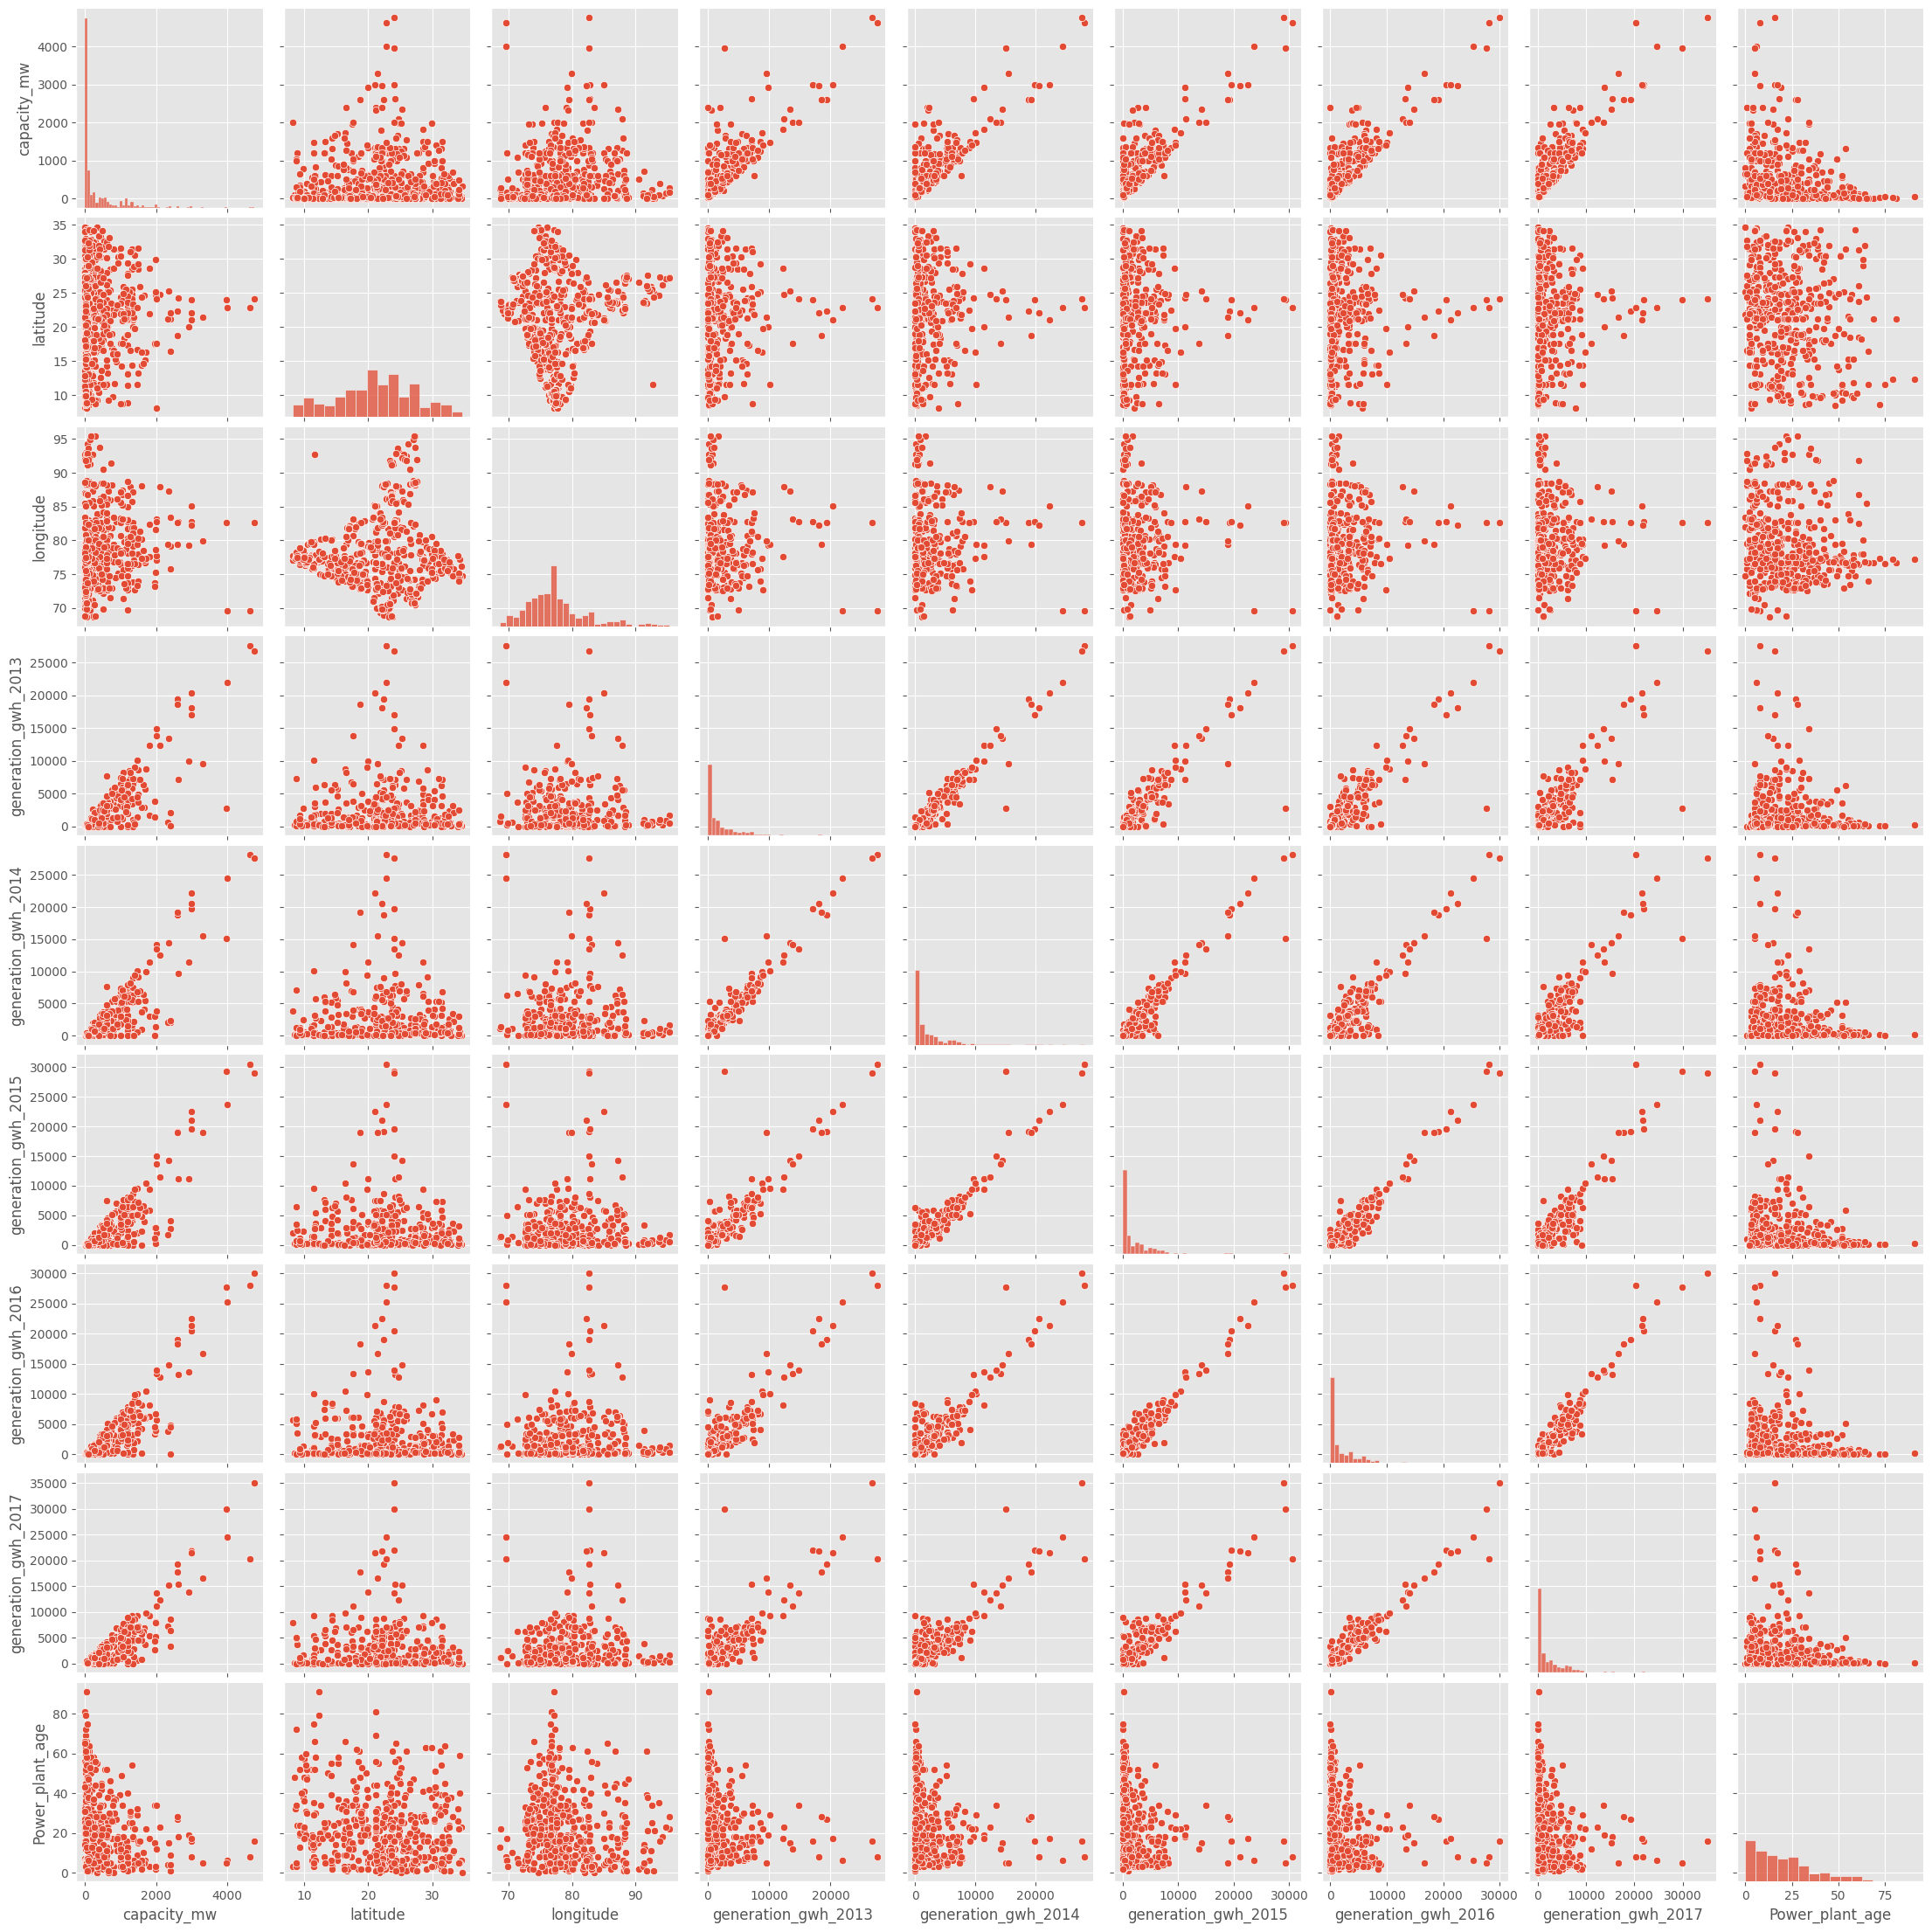

In [49]:
#Checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(df)

# Encoding categorical data

In [50]:
df.drop(columns=['name'],axis=1,inplace=True)

In [51]:
df.drop(columns=['generation_data_source'],axis=1,inplace=True)

In [52]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

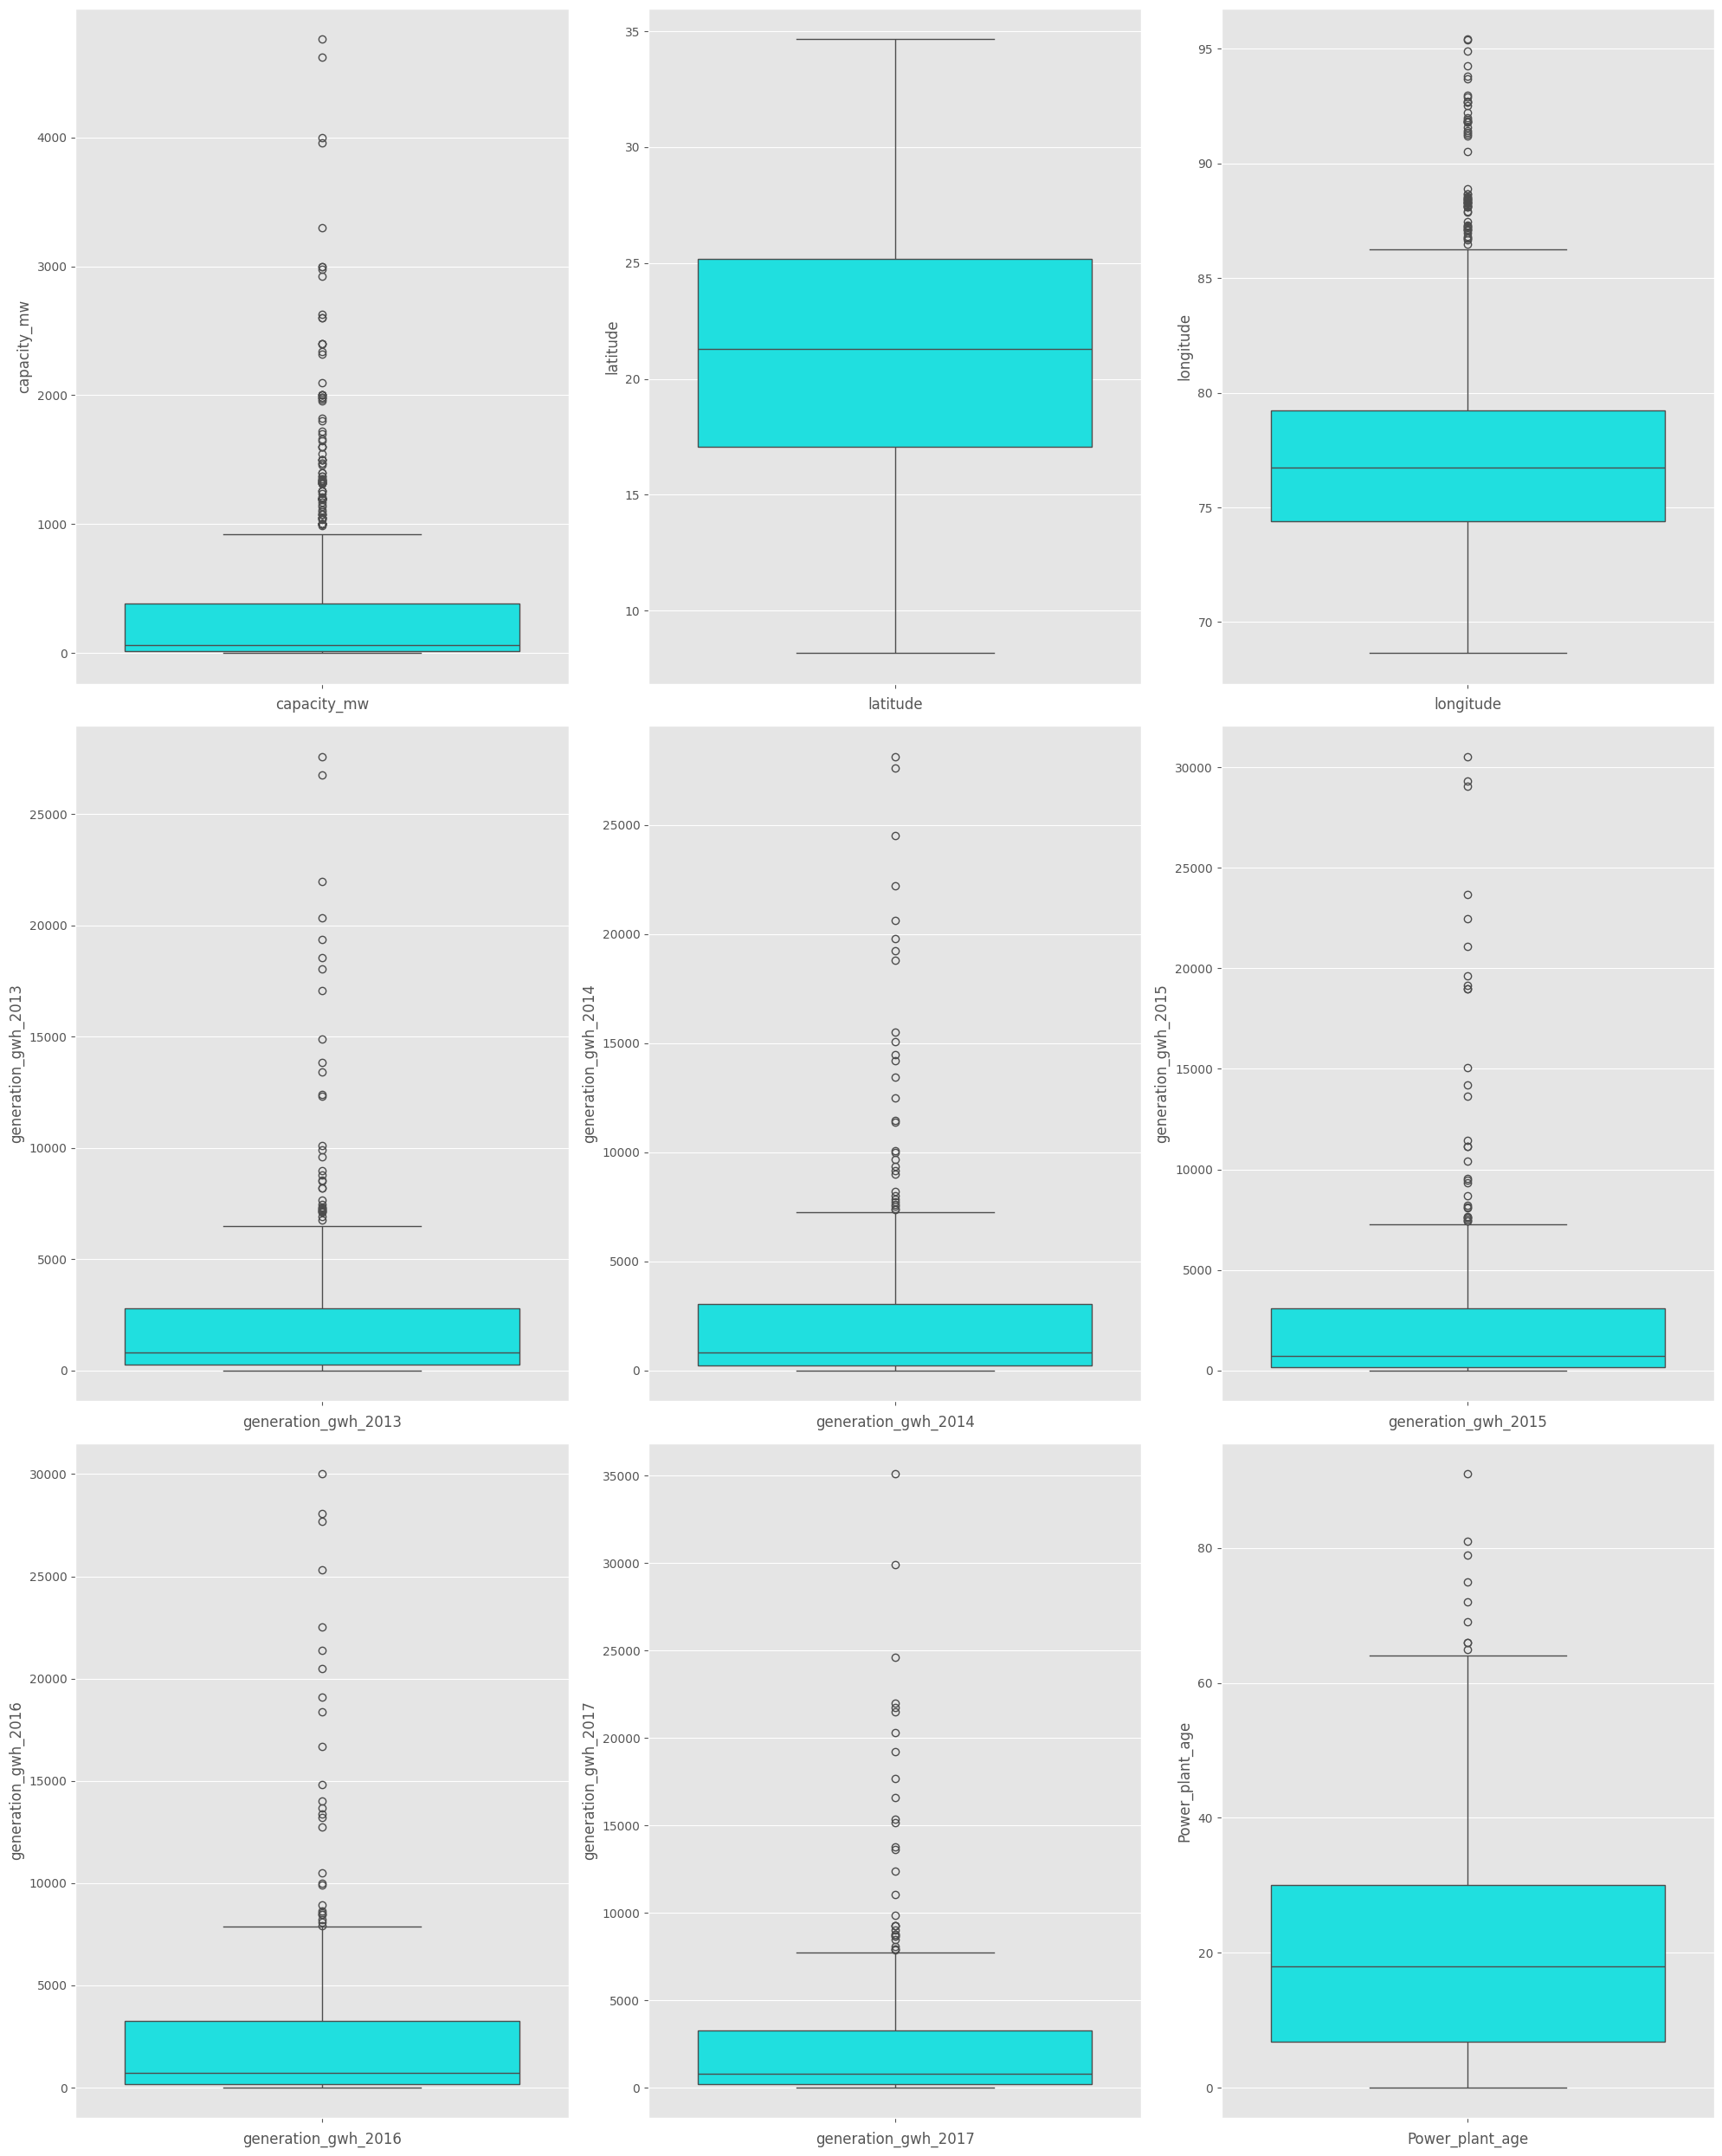

In [54]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

# Data Loss

In [59]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %
